In [2]:
import json
import os 
import sys

import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import math


from myPackage.helpingFunction import showImage

from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data
from skimage.io import imread 
from skimage.filters import threshold_multiotsu
from random import choice

from matplotlib import cm


In [29]:
imageFile = 'cathodeXSection.png'

readImage = cv2.imread(imageFile)

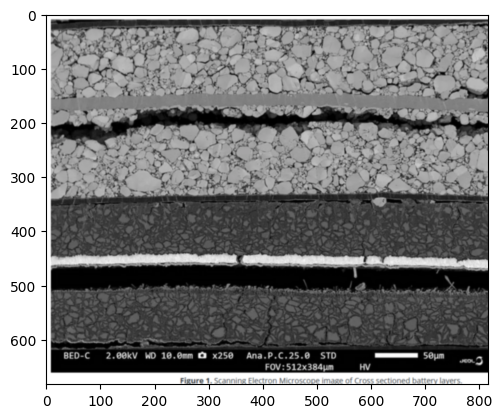

<Axes: >

In [36]:
showImage(readImage)

In [ ]:
#Implementing line detecting - can move the parameters to a different file? 

edges = canny(readImage, 4.5,1,125)

angleLow = math.radians(60)
angleHigh = math.radians(120)

lines = probabilistic_hough_line(edges, threshold = 10
                                  line_lenth = 50, line_gap = 50, theta=np.arange(angleLow, angleHigh, 10**(-4)))

#Generating figure 2



(0.0, 256.0)

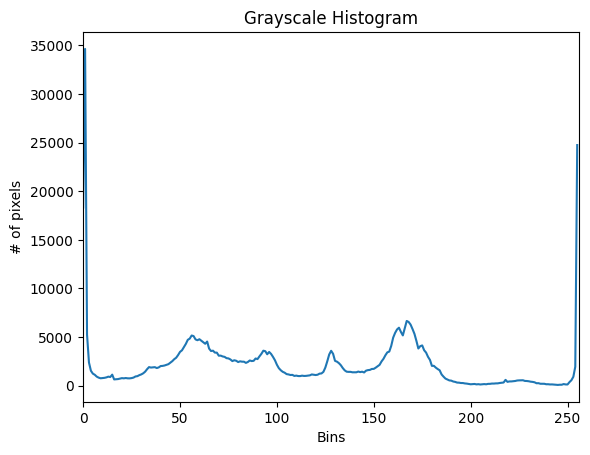

In [39]:
#Calculate histogram of this image

hist = cv2.calcHist([readImage], [0], None, [256], [0,256])
normalizeHist = hist/hist.sum() 


plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(hist)
plt.xlim([0,256])


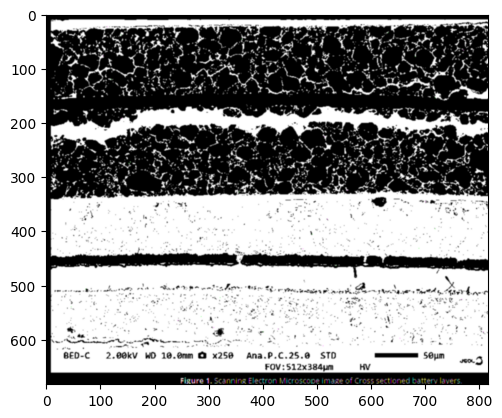

<Axes: >

In [37]:
#Highlighting the field based on grayscale values

threshold = 100
assignValue = 255
thresholdMethod = cv2.THRESH_BINARY_INV

_, result = cv2.threshold(readImage, threshold, assignValue, thresholdMethod)

showImage(result)